<a href="https://colab.research.google.com/github/dahouda2pro/XAI-Image-Class-ViT/blob/main/satellite_Image_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Nov  2 18:16:55 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.141.03   Driver Version: 470.141.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:01:00.0 Off |                  N/A |
| 32%   53C    P8    27W / 420W |     19MiB / 24265MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:21:00.0 Off |                  N/A |
|  0%   

In [ ]:
import tensorflow as tf
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras as K
import tensorflow_addons as tfa
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline


import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
from tensorflow.keras import layers


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adadelta, Adagrad, Adamax, Nadam, Ftrl
from keras.callbacks import EarlyStopping, ModelCheckpoint
#from keras.wrappers.scikit_learn import KerasClassifier
from math import floor
from sklearn.metrics import make_scorer, accuracy_score

from sklearn.model_selection import StratifiedKFold, KFold
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

import random
import cv2
import matplotlib.pyplot as plt
from keras.layers import LeakyReLU
LeakyReLU = LeakyReLU(alpha=0.1)
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)

2023-11-02 18:16:55.817209: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 18:16:55.854242: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-02 18:16:55.854950: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-02 18:16:56.477547: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/user/anaconda3/envs/vt_dahouda_2/lib/python3.8/site-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in M

In [ ]:
!python3 --version
#Python 3.6.9
print(tf.__version__)
#2.3.0
#print(K.__version__)
#2.4.0
print(np.__version__)
#1.18.5
#print(matplotlib.__version__)


Python 3.8.17
2.13.0
1.23.5


In [ ]:
# Connect to my google drive
from pathlib import Path
#from google.colab import drive
#import os
#drive.mount('/content/drive')

In [ ]:
DATADIR= 'data'
CATEGORIES = os.listdir(DATADIR)
print(CATEGORIES)

['desert', 'cloudy', 'water', 'green_area']


In [ ]:
def load_images(DATADIR, CATEGORIES):
    images = []
    labels = []

    nb_images_each_type = []
    for category in CATEGORIES:
        beginning = len(images)
        class_number = CATEGORIES.index(category)
        path = os.path.join(DATADIR, category)
        for img in os.listdir(path):
            img = cv2.imread(os.path.join(path, img))
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (256,256))
            images.append(img)
            labels.append(class_number)

            # Adding rotated image
            param = random.choice([-180, -90, 90])
            if param == -180:
                img_rotated = cv2.rotate(img, cv2.ROTATE_180)
            elif param == -90:
                img_rotated = cv2.rotate(img, cv2.ROTATE_90_COUNTERCLOCKWISE)
            elif param == 90:
                img_rotated = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)
            images.append(img_rotated)
            labels.append(class_number)

            # Adding rotated and cropped image
            img_cropped = img[32:224, 32:224]
            param = random.choice([-180, -90, 90])
            if param == -180:
                img_cropped = cv2.rotate(img_cropped, cv2.ROTATE_180)
            elif param == -90:
                img_cropped = cv2.rotate(img_cropped, cv2.ROTATE_90_COUNTERCLOCKWISE)
            elif param == 90:
                img_cropped = cv2.rotate(img_cropped, cv2.ROTATE_90_CLOCKWISE)
            img_cropped = cv2.resize(img_cropped, (256,256))
            images.append(img_cropped)
            labels.append(class_number)

        end = len(images)
        nb_images_each_type.append(end-beginning)
    images = np.array(images)
    labels = np.array(labels)

    # Displaying dataset info
    print(f'images: {len(images)}; labels: {len(labels)}')
    print('image size:', images[0].shape)
    print('-'*25)
    print('number of images of each label:')
    for i in range(len(CATEGORIES)):
        print(f'{CATEGORIES[i]}: {nb_images_each_type[i]}')
    print('-'*25)
    from sys import getsizeof
    print(f'size of dataset: {getsizeof(images)/1024/1024} MB; {getsizeof(images)/1024/1024/1024} GB')
    plt.imshow(images[random.randint(0, len(images))])

    return images, labels

images: 16893; labels: 16893
image size: (256, 256, 3)
-------------------------
number of images of each label:
desert: 3393
cloudy: 4500
water: 4500
green_area: 4500
-------------------------
size of dataset: 3167.4376525878906 MB; 3.093200832605362 GB


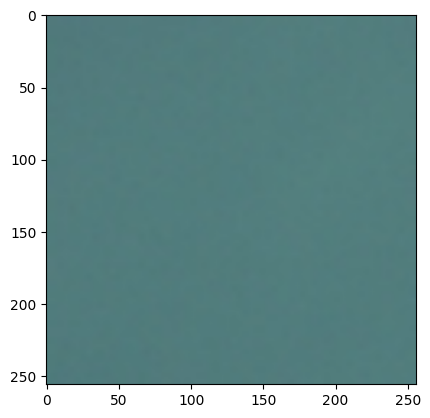

In [ ]:
images, labels = load_images(DATADIR, CATEGORIES)

In [ ]:
from tensorflow.keras.utils import to_categorical

labels = to_categorical(labels)

x_train, x_test, y_train, y_test = train_test_split(images, labels, train_size=.85, random_state=1)
images, labels = 0, 0

In [ ]:

num_classes = 4
input_shape = (256, 256, 3)
IMG_DIM = 256

#(x_train, y_train), (x_test, y_test) = keras.datasets.cifar100.load_data()

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (14359, 256, 256, 3)
y_train shape: (14359, 4)
x_test shape: (2534, 256, 256, 3)
y_test shape: (2534, 4)


In [ ]:
class Config:
    input_size = 256
    input_shape = [input_size, input_size, 3]
    learning_rate = 0.001
    weight_decay = 0.0001
    batch_size = 256
    num_classes = 4
    num_epochs = 100
    image_size = 72
    patch_size = 6
    num_patches = (image_size // patch_size) ** 2
    projection_dim = 64
    num_heads = 4
    transformer_units = [
        projection_dim * 2,
        projection_dim
    ]
    transformer_layers = 8
    mlp_head_units = [512, 512]

In [ ]:
def sample_images(images, row_count, column_count):
    fig, axs = plt.subplots(row_count, column_count, figsize=(10,10))
    for i in range(row_count):
        for j in range(column_count):
            axs[i,j].imshow(images[i * column_count + j])
            axs[i,j].axis('off')
    plt.show()

In [ ]:
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (14359, 256, 256, 3)
y_train shape: (14359, 4)
x_test shape: (2534, 256, 256, 3)
y_test shape: (2534, 4)


In [ ]:
#(train_data.shape, train_labels.shape),(test_data.shape, test_labels.shape)
(x_train.shape, y_train.shape),(x_test.shape, y_test.shape)

(((14359, 256, 256, 3), (14359, 4)), ((2534, 256, 256, 3), (2534, 4)))

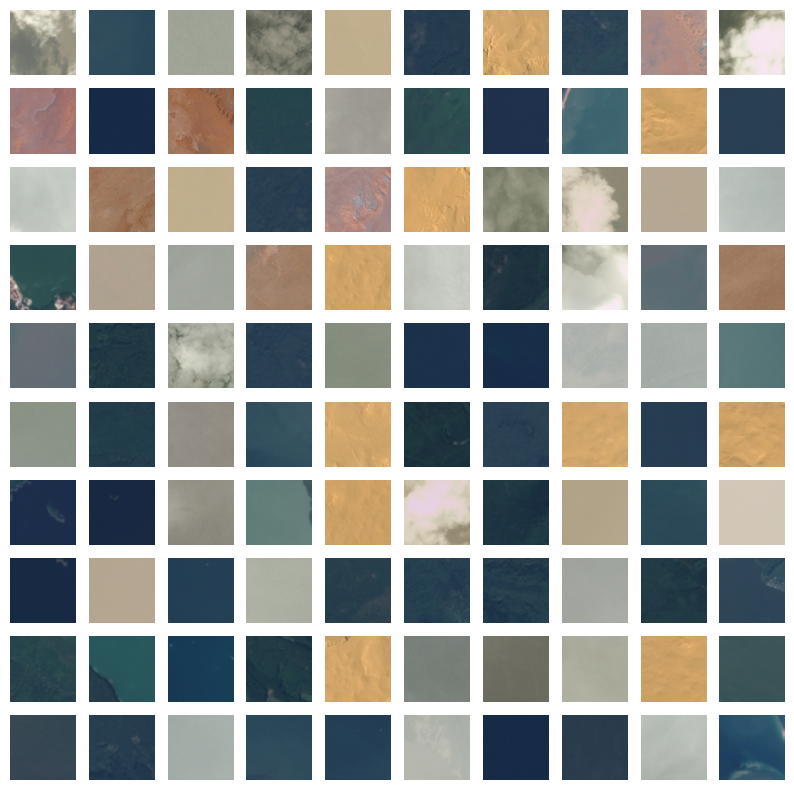

In [ ]:
indices = np.random.choice(x_train.shape[0], 100)
sample_images(x_train[indices], 10, 10)

In [ ]:
#Use data augmentation
augmentation_layer = tf.keras.Sequential([
    keras.layers.Input(Config.input_shape),
    keras.layers.experimental.preprocessing.Normalization(),
    keras.layers.experimental.preprocessing.Resizing(Config.image_size, Config.image_size),
    keras.layers.experimental.preprocessing.RandomRotation(factor=0.02),
    keras.layers.experimental.preprocessing.RandomZoom(height_factor=0.2, width_factor=0.2),
])

2023-11-02 18:17:05.021675: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-02 18:17:05.022532: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-11-02 18:17:05.024982: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the 

In [ ]:
def mlp(x, hidden_units, dropout_rate):
    for units in hidden_units:
        x = layers.Dense(units, activation=tf.nn.gelu)(x)
        x = layers.Dropout(dropout_rate)(x)
    return x

In [ ]:
# Implement patch creation as a layer

class Patches(layers.Layer):
    def __init__(self, patch_size):
        super(Patches, self).__init__()
        self.patch_size = patch_size

    def call(self, images):
        batch_size = tf.shape(images)[0]
        patches = tf.image.extract_patches(
            images = images,
            sizes=[1, self.patch_size, self.patch_size, 1],
            strides=[1, self.patch_size, self.patch_size, 1],
            rates=[1, 1, 1, 1],
            padding="VALID",
        )
        patch_dims = patches.shape[-1]
        patches = tf.reshape(patches, [batch_size, -1, patch_dims])
        return patches

(256, 256, 3)
(1, 72, 72, 3)
Image size: 72 X 72
Patch size: 6 X 6
Patches Sahpe: (1, 144, 108)
Patches per image: 144
Elements per patch: 108


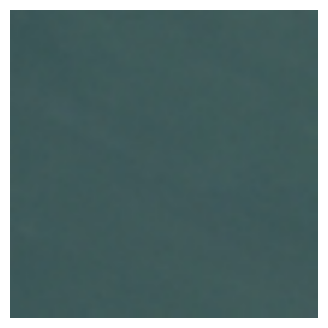

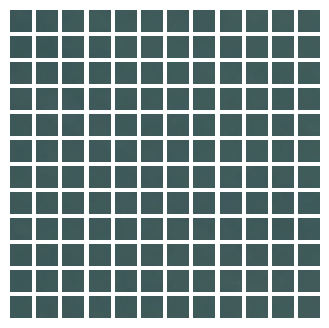

In [ ]:

import matplotlib.pyplot as plt

plt.figure(figsize=(4, 4))
#image = train_data[np.random.choice(range(train_data.shape[0]))]
image = x_train[np.random.choice(range(x_train.shape[0]))]
print(image.shape)
plt.imshow(np.squeeze(image).astype("uint8"))
plt.axis("off")

resized_image = tf.image.resize(
    tf.convert_to_tensor([image]), size=(Config.image_size, Config.image_size)
)
print(resized_image.shape)
patches = Patches(Config.patch_size)(resized_image)
print(f"Image size: {Config.image_size} X {Config.image_size}")
print(f"Patch size: {Config.patch_size} X {Config.patch_size}")
print(f"Patches Sahpe: {patches.shape}")
print(f"Patches per image: {patches.shape[1]}")
print(f"Elements per patch: {patches.shape[-1]}")

n = int(np.sqrt(patches.shape[1]))
plt.figure(figsize=(4, 4))
for i, patch in enumerate(patches[0]):
    ax = plt.subplot(n, n, i + 1)
    patch_img = tf.reshape(patch, (Config.patch_size, Config.patch_size, 3))
    plt.imshow(patch_img.numpy().astype("uint8"))
    plt.axis("off")

In [ ]:
"""
The PatchEncoder layer will linearly transform a patch by projecting it into a vector of size projection_dim. In addition, it adds a learnable position embedding to the projected vector.

"""
class PatchEncoder(layers.Layer):

    def __init__(self, num_patches, projection_dim):
        super(PatchEncoder, self).__init__()
        self.num_patches = num_patches
        self.projection = layers.Dense(projection_dim)
        self.position_embedding = layers.Embedding(
            input_dim=num_patches, output_dim=projection_dim
        )
    def call(self, patch):
        positions = tf.range(start=0, limit=self.num_patches, delta=1)
        encoded = self.projection(patch) + self.position_embedding(positions)
        return encoded

## Build the ViT model

In [ ]:
def create_vision_transformer():
    # Inputs
    inputs = layers.Input(shape=Config.input_shape)
    # Data Augmentation
    augmented = augmentation_layer(inputs)
    # Patches
    patches = Patches(Config.patch_size)(augmented)
    encoder_patches = PatchEncoder(Config.num_patches, Config.projection_dim)(patches)

    for _ in range(Config.transformer_layers):
        # Layer Normalization 1
        x1 = layers.LayerNormalization(epsilon=1e-6)(encoder_patches)
        # Multi-Head Attention Layer
        attention_output = layers.MultiHeadAttention(
            num_heads=Config.num_heads,
            key_dim=Config.projection_dim,
            dropout=0.1
        )(x1, x1)
        # Skip Connnection 1
        x2 = layers.Add()([attention_output, encoder_patches])

        # Layer Normalization 2
        x3 = layers.LayerNormalization(epsilon=1e-6)(x2)

        # MLP
        x3 = mlp(x3, hidden_units=Config.transformer_units, dropout_rate=0.1)

        # Skip Connnection 2
        encoder_patches = layers.Add()([x3, x2])

    representation = layers.LayerNormalization(epsilon=1e-6)(encoder_patches)
    representation = layers.Flatten()(representation)
    representation = layers.Dropout(0.5)(representation)

    features = mlp(representation, hidden_units=Config.mlp_head_units, dropout_rate=0.5)

    outputs = layers.Dense(Config.num_classes)(features)

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

### Compile, train, and evaluate the model

In [ ]:
keras.backend.clear_session()
vit_classifier = create_vision_transformer()
vit_classifier.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 sequential (Sequential)     (None, 72, 72, 3)            7         ['input_1[0][0]']             
                                                                                                  
 patches (Patches)           (None, None, 108)            0         ['sequential[0][0]']          
                                                                                                  
 patch_encoder (PatchEncode  (None, 144, 64)              16192     ['patches[0][0]']             
 r)                                                                                           

In [ ]:
optimizer = tfa.optimizers.AdamW(
    learning_rate=Config.learning_rate,
    weight_decay=Config.weight_decay
)
vit_classifier.compile(
    loss=keras.losses.CategoricalCrossentropy(from_logits=True),
    optimizer=optimizer,
    metrics=["accuracy"]
)
checkpoint_path = "model.h5"
checkpoint = keras.callbacks.ModelCheckpoint(
    checkpoint_path,
    monitor="val_accuracy",
    save_best_only=True,
    save_weights_only=True
)

In [ ]:
history = vit_classifier.fit(x_train, y_train, verbose=1, epochs=5, batch_size=Config.batch_size, validation_data=(x_test, y_test), callbacks=[checkpoint])

Epoch 1/5
57/57 [==============================] - 216s 4s/step - loss: 1.1139 - accuracy: 0.6222 - val_loss: 0.5154 - val_accuracy: 0.8062
Epoch 2/5
57/57 [==============================] - 208s 4s/step - loss: 0.5678 - accuracy: 0.7487 - val_loss: 0.4672 - val_accuracy: 0.7995
Epoch 3/5
57/57 [==============================] - 210s 4s/step - loss: 0.5142 - accuracy: 0.7778 - val_loss: 0.4124 - val_accuracy: 0.8299
Epoch 4/5
57/57 [==============================] - 208s 4s/step - loss: 0.4641 - accuracy: 0.8027 - val_loss: 0.3635 - val_accuracy: 0.8536
Epoch 5/5
57/57 [==============================] - 213s 4s/step - loss: 0.4376 - accuracy: 0.8140 - val_loss: 0.3482 - val_accuracy: 0.8666


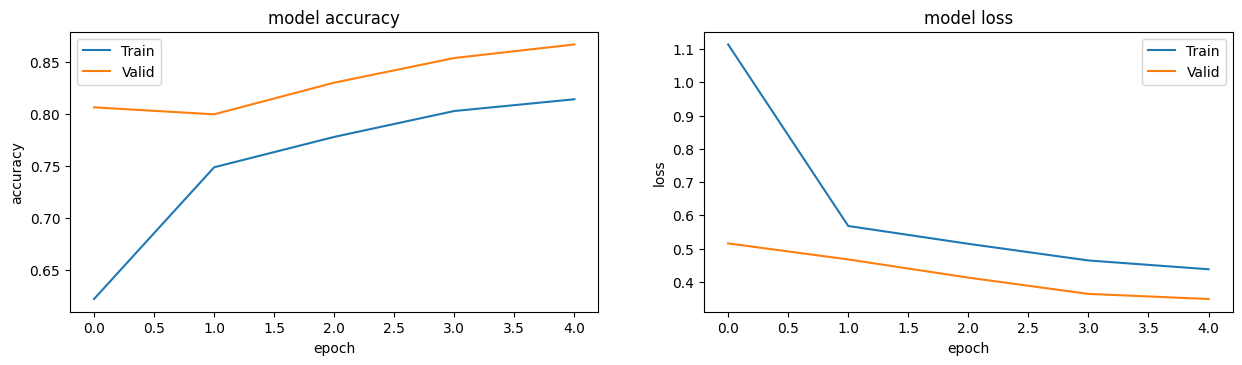

In [ ]:
  # print(history_dict)
plot = 0
def plot_history(history):
    plt.figure(1, figsize = (15,8))
    plt.subplot(221)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Valid'])
    plt.subplot(222)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['Train', 'Valid'])
    plot = 0
    plt.savefig('Loss_Acc_'+str(plot)+'.pdf')
    plt.savefig('Loss_Acc_'+str(plot)+'.png')
    plot = plot + 1
    plt.show()

  # plot the model accuracy and loss results
plot_history(history)